# **DIABETES PREDICTION**

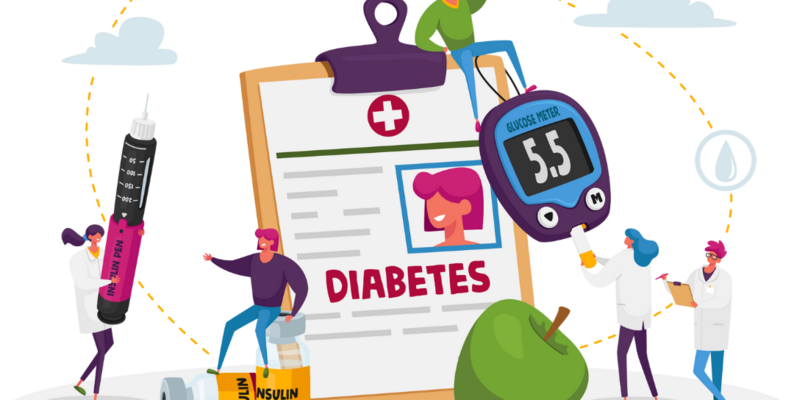

# **ABOUT DATASET:**
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [ ]:
!unzip '/content/diabetes_prediction_dataset.csv.zip'

Archive:  /content/diabetes_prediction_dataset.csv.zip
replace diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes_prediction_dataset.csv  


# **IMPORT ALL NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# **LOAD AND AUDIT THE DATA**

In [ ]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.duplicated().sum()

3854

In [ ]:
#REMOVE THE DUPLICATES
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
#unique values in given columns
columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

for i in columns:
    print(i,':',df[i].unique())

gender : ['Female' 'Male' 'Other']
hypertension : [0 1]
heart_disease : [1 0]
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
diabetes : [0 1]


# **DATA PREPARATION AND VISUALIZATION**

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['hypertension'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['heart_disease'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['hypertension'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_15, *['heart_disease'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_16, *['bmi'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_17, *[[['age', 'hypertension'], ['hypertension', 'heart_disease'], ['heart_disease', 'bmi'], ['bmi', 'HbA1c_level']]], **{})
chart

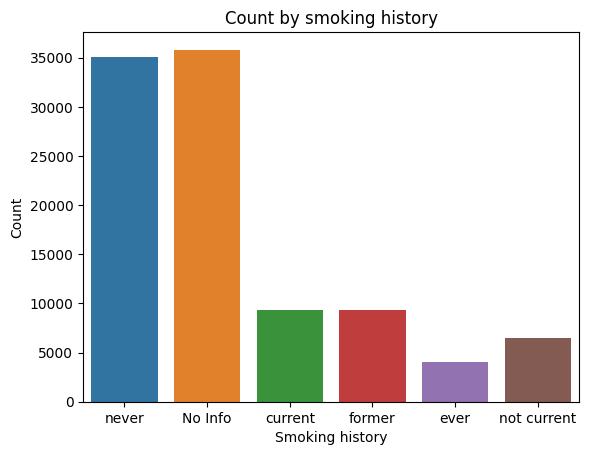

In [ ]:
#Count of individuals by smooking history
sns.countplot(x = 'smoking_history', data = df)
plt.xlabel('Smoking history')
plt.ylabel('Count')
plt.title('Count by smoking history')
plt.show()

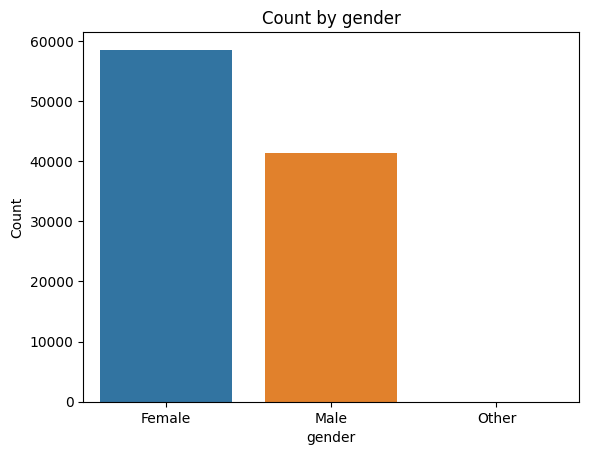

In [ ]:
sns.countplot(x = 'gender', data = df)
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Count by gender')
plt.show()


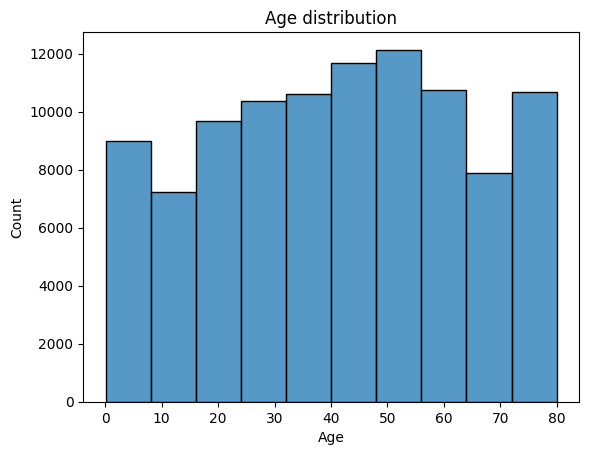

In [ ]:
#AGE DISTRIBUTION
sns.histplot(df['age'], bins = 10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

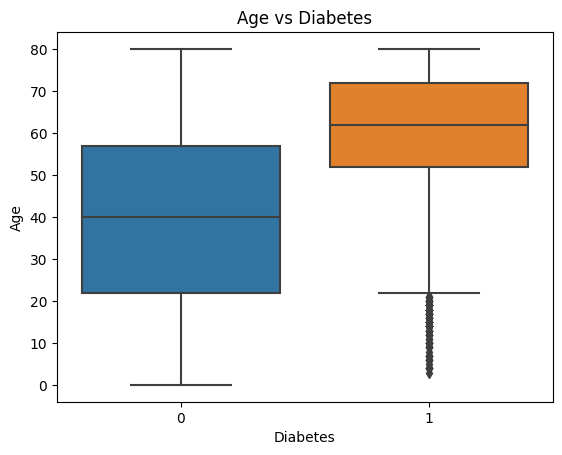

In [ ]:
sns.boxplot(x = 'diabetes', y = 'age', data = df)
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.title('Age vs Diabetes')
plt.show()

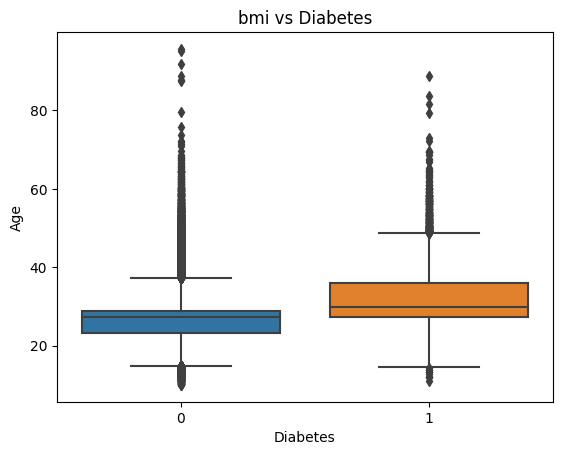

In [ ]:
sns.boxplot(x = 'diabetes', y = 'bmi', data = df)
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.title('bmi vs Diabetes')
plt.show()

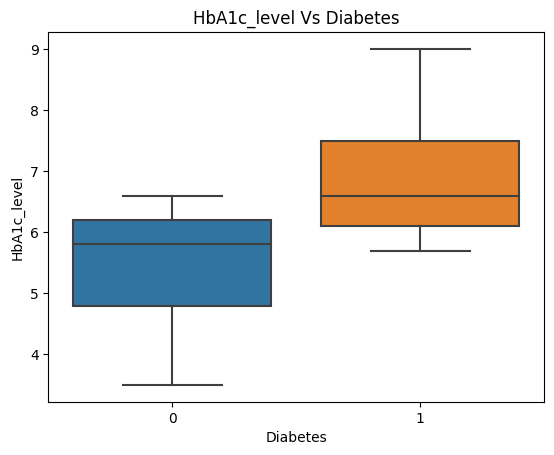

In [ ]:
sns.boxplot(x = 'diabetes', y = 'HbA1c_level', data = df)
plt.xlabel('Diabetes')
plt.ylabel('HbA1c_level')
plt.title('HbA1c_level Vs Diabetes')
plt.show()

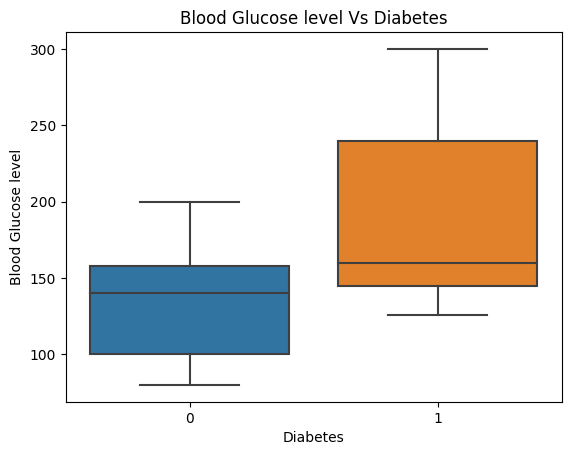

In [ ]:
sns.boxplot(x = 'diabetes', y = 'blood_glucose_level', data = df)
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose level')
plt.title('Blood Glucose level Vs Diabetes')
plt.show()

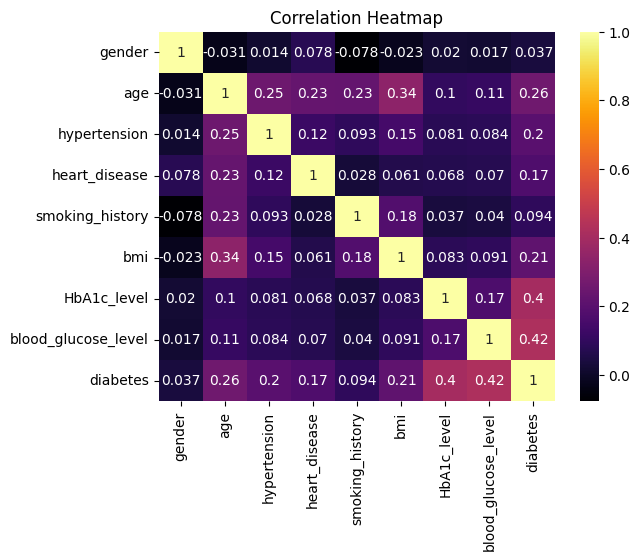

In [ ]:
sns.heatmap(df.corr(),annot = True, cmap = 'inferno')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

# **ENCODING**

In [ ]:
#LABEL ENCODER CONVERT STRING TO NUMBER
def encode(df):
  le = LabelEncoder()
  for i in df.columns:
    if df[i].dtype == 'object':
      df[i] = le.fit_transform(df[i])
  return df

In [ ]:
encode(df)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


# **SPLIT THE DATA INTO X AND Y**

In [ ]:
x = df.drop(['diabetes'],axis = 1)
y = df['diabetes']

In [ ]:
print(x.shape)
print(y.shape)

(100000, 8)
(100000,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 8)
(20000, 8)
(80000,)
(20000,)


# **LOGISTIC ALGORITHM IMPLEMENTATION**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
preds_ytrain_lr = lr.predict(x_train)
preds_ytest_lr = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(y_train)

22302    0
49609    0
89251    0
96385    0
17569    0
        ..
63206    0
61404    0
17730    0
28030    0
15725    0
Name: diabetes, Length: 80000, dtype: int64


In [ ]:
print(x_train)

       gender    age  hypertension  heart_disease  smoking_history    bmi  \
22302       0  16.00             0              0                4  22.60   
49609       1  46.00             0              0                2  42.58   
89251       0   6.00             0              0                0  18.58   
96385       0  20.00             0              0                0  19.46   
17569       0   4.00             0              0                0  15.79   
...       ...    ...           ...            ...              ...    ...   
63206       0  23.00             0              0                0  28.09   
61404       0  65.00             0              0                0  37.75   
17730       0  11.00             0              0                0  27.32   
28030       1   0.24             0              0                0  12.85   
15725       0   1.24             0              0                0  15.45   

       HbA1c_level  blood_glucose_level  
22302          3.5               

In [ ]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual,predicted)
  print('The Accuracy of the model is:',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [ ]:
acc_report(y_train,preds_ytrain_lr)
acc_report(y_test,preds_ytest_lr)

The Accuracy of the model is: 0.95
[[72207  1042]
 [ 2724  4027]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     73249
           1       0.79      0.60      0.68      6751

    accuracy                           0.95     80000
   macro avg       0.88      0.79      0.83     80000
weighted avg       0.95      0.95      0.95     80000

The Accuracy of the model is: 0.95
[[18000   251]
 [  723  1026]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18251
           1       0.80      0.59      0.68      1749

    accuracy                           0.95     20000
   macro avg       0.88      0.79      0.83     20000
weighted avg       0.95      0.95      0.95     20000



# **DECISION TREE IMPLEMENTATION**

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [ ]:
acc_report(y_train,preds_dtree_train)
acc_report(y_test,preds_dtree_test)

The Accuracy of the model is: 1.0
[[73248     1]
 [   50  6701]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73249
           1       1.00      0.99      1.00      6751

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

The Accuracy of the model is: 0.95
[[17729   522]
 [  468  1281]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18251
           1       0.71      0.73      0.72      1749

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



# **RANDOM FOREST IMPLEMENTATION**

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [ ]:
acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

The Accuracy of the model is: 1.0
[[73241     8]
 [   43  6708]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73249
           1       1.00      0.99      1.00      6751

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

The Accuracy of the model is: 0.97
[[18170    81]
 [  569  1180]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18251
           1       0.94      0.67      0.78      1749

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.88     20000
weighted avg       0.97      0.97      0.97     20000



# **ADA BOOST IMPLEMNETATION**

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [ ]:
acc_report(y_train,preds_ada_train)
acc_report(y_test,preds_ada_test)

The Accuracy of the model is: 0.97
[[73144   105]
 [ 2090  4661]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     73249
           1       0.98      0.69      0.81      6751

    accuracy                           0.97     80000
   macro avg       0.98      0.84      0.90     80000
weighted avg       0.97      0.97      0.97     80000

The Accuracy of the model is: 0.97
[[18225    26]
 [  571  1178]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18251
           1       0.98      0.67      0.80      1749

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
preds_knn_train = knn.predict(x_train)
preds_knn_test = knn.predict(x_test)

In [ ]:
acc_report(y_train,preds_knn_train)
acc_report(y_test,preds_knn_test)

The Accuracy of the model is: 0.96
[[72976   273]
 [ 2681  4070]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     73249
           1       0.94      0.60      0.73      6751

    accuracy                           0.96     80000
   macro avg       0.95      0.80      0.86     80000
weighted avg       0.96      0.96      0.96     80000

The Accuracy of the model is: 0.95
[[18115   136]
 [  843   906]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18251
           1       0.87      0.52      0.65      1749

    accuracy                           0.95     20000
   macro avg       0.91      0.76      0.81     20000
weighted avg       0.95      0.95      0.95     20000



# **GRADIENT BOOSTING IMPLEMENTATION**

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
preds_gb_train = gb.predict(x_train)
preds_gb_test = gb.predict(x_test)

In [ ]:
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

The Accuracy of the model is: 0.97
[[73196    53]
 [ 2111  4640]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     73249
           1       0.99      0.69      0.81      6751

    accuracy                           0.97     80000
   macro avg       0.98      0.84      0.90     80000
weighted avg       0.97      0.97      0.97     80000

The Accuracy of the model is: 0.97
[[18230    21]
 [  578  1171]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18251
           1       0.98      0.67      0.80      1749

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000



# **CONCLUSION:**
Predicting diabetes is a complex task that involves analyzing various factors and using predictive models to estimate the risk of developing diabetes. While I can't provide real-time or patient-specific predictions, I can discuss the general approach and key factors involved in diabetes prediction and offer a hypothetical conclusion based on the available data